In [1]:
from spaces import *
import numpy as np
from model.player import Player

In [2]:
statespace = Space(name="statespace")

In [3]:
statespace.append_dimension("Alice", Player)
statespace.append_dimension("Bob", Player)

In [4]:
statespace.dimensions

['Alice', 'Bob']

In [5]:
state = statespace.point({"Alice":(0,0),"Bob":(1,1)})

In [6]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(0, 0, 1, 1)

In [7]:
traj = Trajectory(state)

In [8]:
traj.space.name

'statespace'

In [9]:
for p in traj.points:
    print((p.Alice.x,p.Alice.y))
    print((p.Bob.x,p.Bob.y))

(0, 0)
(1, 1)


In [10]:
def tag_dynamics(point):
    
    point.Alice.chase(point.Bob)
    point.Bob.evade(point.Alice)

    return point


In [11]:
dyn = Dynamics(statespace, step=tag_dynamics)
traj.set_dynamics(dyn)

In [12]:
traj.dynamics.step

<function __main__.tag_dynamics(point)>

In [13]:
traj.points

In [14]:
traj.apply_dynamics(10)

In [15]:
traj.points

In [16]:
import matplotlib.pyplot as plt

In [17]:
t = range(traj.length)
alice_pos = [(p.Alice.x,p.Alice.y) for p in traj.points ]
bob_pos = [(p.Bob.x,p.Bob.y) for p in traj.points ]

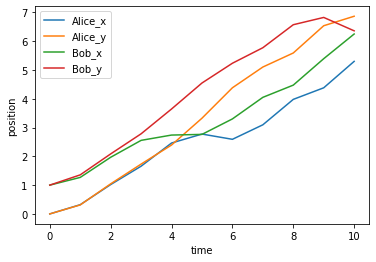

In [18]:
plt.plot(t,alice_pos, t, bob_pos)
plt.xlabel("time")
plt.ylabel("position")
plt.legend(["Alice_x", "Alice_y","Bob_x","Bob_y"])

In [19]:
state = traj.points[-1]

In [20]:
state.Alice.x, state.Alice.y, state.Bob.x, state.Bob.y

(5.298860384580804, 6.866192561071325, 6.249096419252206, 6.3598714797017815)